# Task
Generate Python code for a Jupyter notebook to load, visualize, and analyze spatial omics data, focusing on spatial patterns, clustering, and relationships between spatial features.

## Load spatial omics data from another Google Drive

### Subtask:
Load the spatial omics data from another Google Drive (e.g., University account). This might involve reading from specific file formats commonly used in spatial omics.


**Reasoning**:
The data is protected and has to be used with your university Google Drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The path to your university folder will now be inside your personal mounted drive
# via the shortcut you created.
univ_folder_path = '/content/drive/My Drive/Ovary'

# You can now list the files inside it to verify
import os
print(os.listdir(univ_folder_path))

['HBM539.JDPH.785', 'HBM853.LCNF.879']


# Task
Generate Python code to perform spatial omics data visualization and exploration using scanpy, squidpy, and spatialdata libraries.

## Load spatial omics data

### Subtask:
Load the spatial omics data into a suitable data structure (e.g., AnnData object). This might involve reading from specific file formats commonly used in spatial omics.


**Reasoning**:
Import the anndata library and load the spatial omics data into an AnnData object using read_visium, then print the object.



In [2]:
%pip install anndata scanpy squidpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.3/161.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import numpy as np
import pandas as pd
import os
import anndata as ad
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text

squidpy==1.6.5


In [5]:
# The path to your university folder will now be inside your personal mounted drive
# via the shortcut you created.
university_folder_path = '/content/drive/My Drive/Ovary/HBM853.LCNF.879'

# Assuming the spatial omics data is in .h5ad format within the specified folder
# You might need to adjust the filename if it's different
data_file_path = os.path.join(university_folder_path, 'expr.h5ad')

try:
    adata = ad.read_h5ad(data_file_path)
    print(adata)
except FileNotFoundError:
    print(f"Error: The file '{data_file_path}' was not found.")
    print("Please make sure the filename and path are correct.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

AnnData object with n_obs × n_vars = 4992 × 60286
    obs: 'Tissue Coverage Fraction'
    var: 'hugo_symbol'
    uns: 'X_spatial_units', 'spatial'
    obsm: 'X_spatial', 'X_spatial_gpr', 'spatial'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'


## Visualize spatial data

### Subtask:
Generate spatial plots to visualize the tissue architecture and the spatial distribution of different features (e.g., gene expression, protein abundance) using `squidpy`.

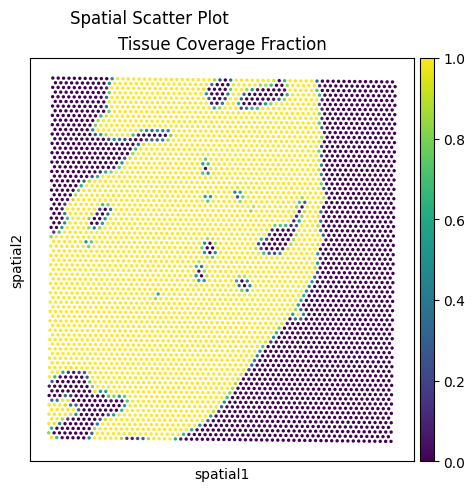

In [6]:
import squidpy as sq
import matplotlib.pyplot as plt

# Assuming 'adata' is already loaded from the previous step
# If not, you will need to load it first

# Generate a basic spatial plot without an image background
sq.pl.spatial_scatter(adata, color='Tissue Coverage Fraction', img=False)

plt.suptitle('Spatial Scatter Plot')
plt.show()

## Perform spatial clustering and compute spatial neighbors

### Subtask: Perform louvain clustering

In [10]:
%pip install igraph louvain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.3 MB/s eta 0:00:00


In [11]:
import scanpy as sc
import squidpy as sq
import numpy as np # Import numpy for checking matrix existence

# Perform spatial clustering using scanpy after computing spatial neighbors with squidpy
# Compute spatial neighbors
sq.gr.spatial_neighbors(adata)

# Manually add the graph to adata.uns['neighbors'] for scanpy clustering
# Check if spatial_connectivities and spatial_distances are in adata.obsp
if 'spatial_connectivities' in adata.obsp and 'spatial_distances' in adata.obsp:
    adata.uns['neighbors'] = {}
    adata.uns['neighbors']['connectivities'] = adata.obsp['spatial_connectivities']
    adata.uns['neighbors']['distances'] = adata.obsp['spatial_distances']
    # Add the parameters used to compute the neighbors for scanpy's checks
    # Assuming default parameters from squidpy if n_neighbors is not available
    # This might need adjustment based on actual squidpy implementation details for default neighbors
    # As a placeholder, we can add minimal required keys if scanpy checks for them
    adata.uns['neighbors']['params'] = {'n_neighbors': None, 'metric': None, 'method': 'spatial'} # Add placeholder params

    print("Spatial neighbors graph copied to adata.uns['neighbors'].")

    # Perform Louvain clustering using scanpy
    sc.tl.louvain(adata) # Use scanpy's Louvain clustering

    # Print the cluster assignments
    if 'louvain' in adata.obs.columns:
        print("\nLouvain clustering completed. Cluster assignments:")
        print(adata.obs['louvain'].value_counts())
    else:
        print("\nLouvain clustering did not add 'louvain' to adata.obs.")


else:
    print("Spatial connectivities or distances not found in adata.obsp.")
    print("Cannot proceed with Louvain clustering.")

Spatial neighbors graph copied to adata.uns['neighbors'].

Louvain clustering completed. Cluster assignments:
louvain
0     299
1     280
2     261
3     259
4     254
5     236
6     224
7     218
8     213
9     206
10    202
11    198
12    192
13    191
14    191
15    179
16    176
17    172
18    170
19    165
20    164
21    142
22    139
23    132
24    129
Name: count, dtype: int64


In [12]:
%pip install omnipath

Attempting to load raw data from: /content/drive/My Drive/Ovary/HBM853.LCNF.879/raw_expr.h5ad
Raw data loaded from /content/drive/My Drive/Ovary/HBM853.LCNF.879/raw_expr.h5ad and assigned to adata.raw

Finding marker genes for each cluster...


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result


Analyzing spatial relationships between clusters...


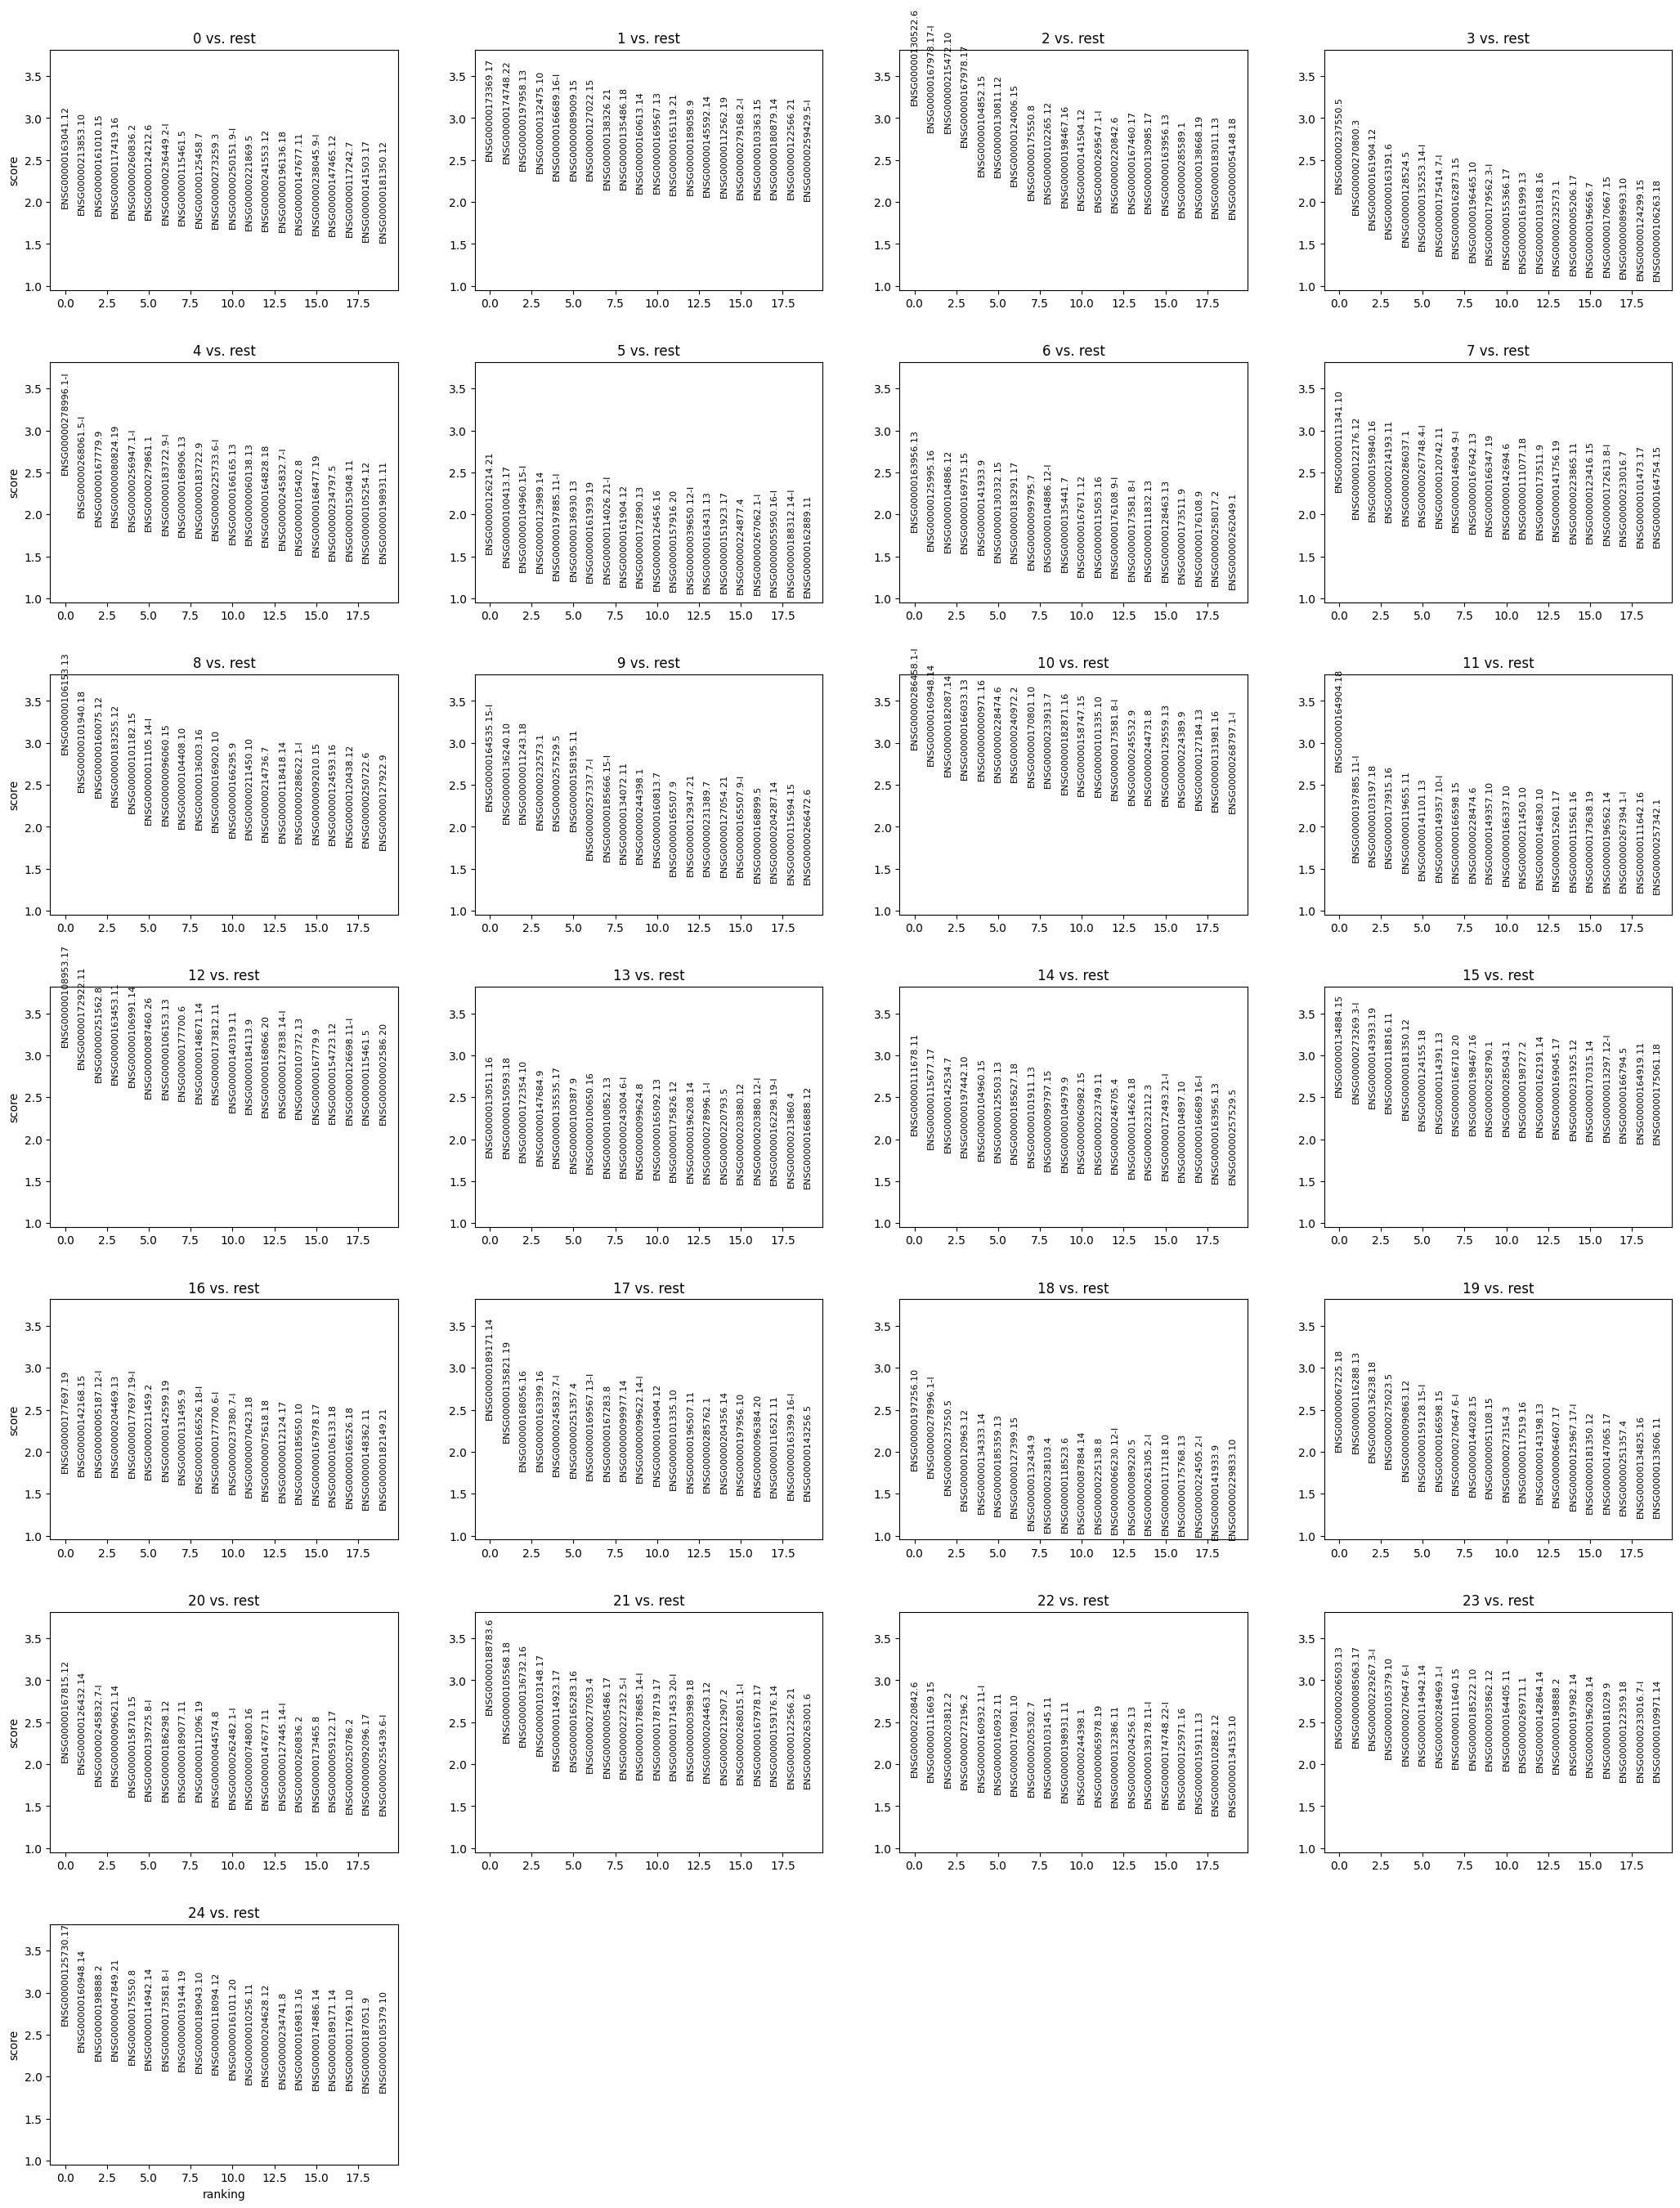

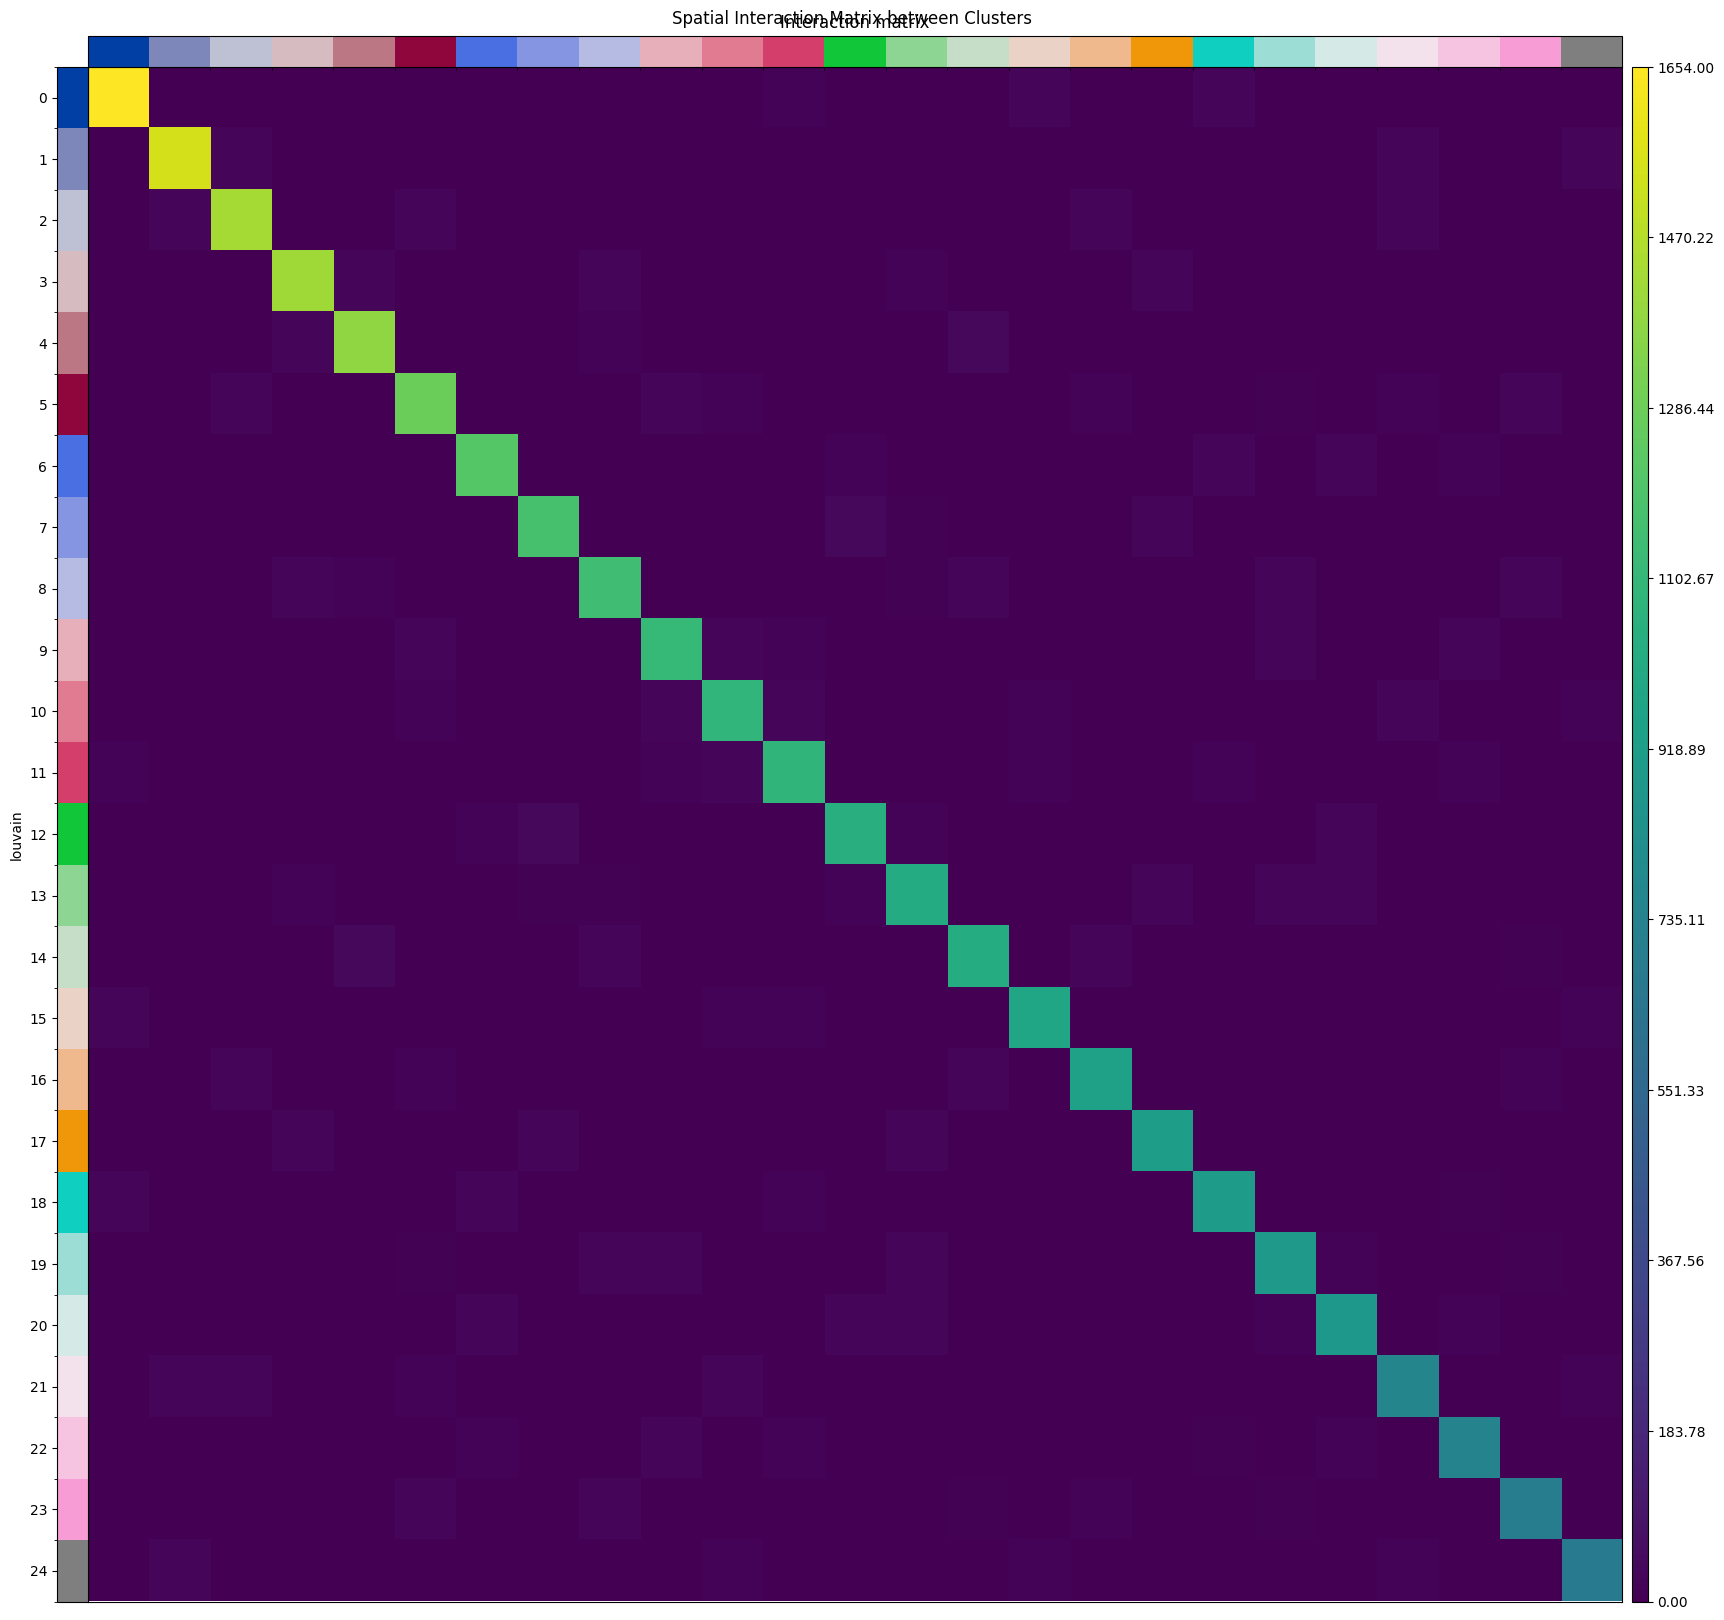


Analyzing spatial co-occurrence...


  0%|          | 0/1 [00:00<?, ?/s]

Plotting co-occurrence for cluster: 0
ERROR: Unable to fetch palette, reason: 'louvain_colors'. Using `None`.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


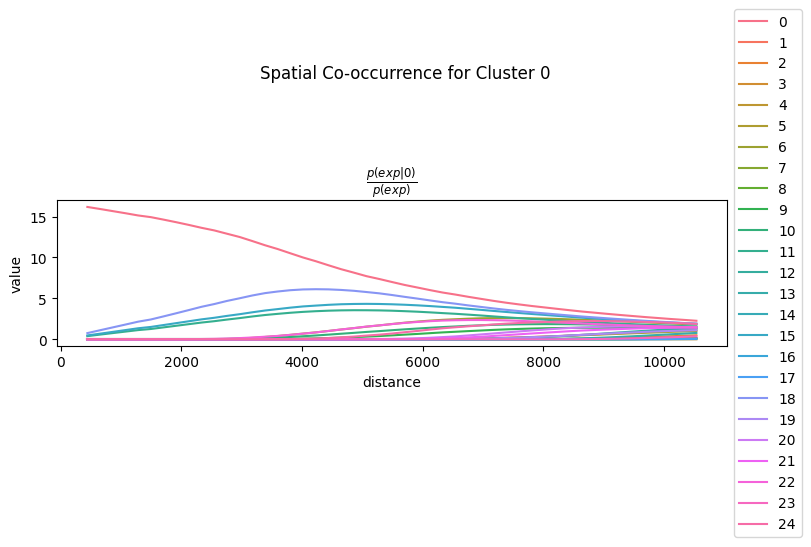

ModuleNotFoundError: No module named 'omnipath'

In [13]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import anndata as ad # Import anndata
import os # Import os

# Assuming 'adata' is loaded and 'louvain' clustering results are in adata.obs['louvain']
# Assuming 'university_folder_path' is defined (e.g., '/content/drive/My Drive/Ovary')

# The correct path to the raw data file provided by the user
raw_h5ad_path = '/content/drive/My Drive/Ovary/HBM853.LCNF.879/raw_expr.h5ad'

print(f"Attempting to load raw data from: {raw_h5ad_path}") # Add print for debugging


try:
    adata.raw = ad.read_h5ad(raw_h5ad_path)
    print(f"Raw data loaded from {raw_h5ad_path} and assigned to adata.raw")
except FileNotFoundError:
    print(f"Error: Raw data file '{raw_h5ad_path}' not found.")
    print("Cannot assign raw data to adata.raw. sc.tl.rank_genes_groups might still work but it's recommended to use raw counts.")
except Exception as e:
    print(f"An error occurred while loading raw data: {e}")


# Analyze gene expression patterns within each cluster (Find marker genes)
print("\nFinding marker genes for each cluster...")
# Use use_raw=True to ensure raw data is used if available
# Added a check for adata.raw before calling rank_genes_groups with use_raw=True
if adata.raw is not None:
    sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon', use_raw=True)
    sc.pl.rank_genes_groups(adata, key='rank_genes_groups', show=False) # Don't show immediately, save to access results

    # To access the results of marker gene analysis:
    # print(adata.uns['rank_genes_groups'])
    # You can visualize the top marker genes using:
    # sc.pl.rank_genes_groups_dotplot(adata, key='rank_genes_groups', standard_scale='var')
    # plt.suptitle('Top Marker Genes per Cluster')
    # plt.show()
else:
    print("adata.raw is not populated. Skipping sc.tl.rank_genes_groups with use_raw=True.")


# Analyze spatial relationships between clusters (Interaction matrix)
print("\nAnalyzing spatial relationships between clusters...")
# Added check for 'louvain' column before proceeding
if 'louvain' in adata.obs.columns:
    sq.gr.interaction_matrix(adata, cluster_key='louvain')
    sq.pl.interaction_matrix(adata, cluster_key='louvain')
    plt.suptitle('Spatial Interaction Matrix between Clusters')
    plt.show()
else:
    print("'louvain' column not found in adata.obs. Skipping spatial interaction matrix analysis.")


# Analyze spatial co-occurrence across spatial dimensions
print("\nAnalyzing spatial co-occurrence...")
# Added check for 'louvain' column before proceeding
if 'louvain' in adata.obs.columns:
    sq.gr.co_occurrence(adata, cluster_key="louvain") # Use 'louvain' as the cluster key
    # You can plot co-occurrence for specific clusters, e.g., the first cluster (usually '0')
    # Replace '0' with the actual cluster identifier you want to visualize
    if adata.obs['louvain'].nunique() > 0:
        cluster_to_plot = adata.obs['louvain'].cat.categories[0] # Get the first cluster category
        print(f"Plotting co-occurrence for cluster: {cluster_to_plot}")
        sq.pl.co_occurrence(
            adata,
            cluster_key="louvain",
            clusters=cluster_to_plot, # Use the cluster identifier
            figsize=(8, 4),
        )
        plt.suptitle(f'Spatial Co-occurrence for Cluster {cluster_to_plot}')
        plt.show()
    else:
        print("No clusters available for co-occurrence plotting.")
else:
     print("'louvain' column not found in adata.obs. Skipping spatial co-occurrence analysis.")


# Perform enriched ligand-receptor analysis between clusters
# This requires a ligand-receptor database and can be computationally intensive
import omnipath # Import the omnipath library
print("\nPerforming enriched ligand-receptor analysis...")
try:
    # Ensure the raw data is available and louvain column exists for ligrec analysis
    if adata.raw is not None and 'louvain' in adata.obs.columns:
        # Note: Ligand-receptor analysis can be computationally intensive and may require specific databases
        # This might also require specifying source and target groups based on your clusters
        # Example: sq.gr.ligrec(adata, cluster_key='louvain', source_groups=['cluster1'], target_groups=['cluster2'])
        print("Attempting ligand-receptor analysis with all clusters...")
        sq.gr.ligrec(
            adata,
            n_perms=100, # Added n_perms for permutation testing
            cluster_key="louvain",
            use_raw=True # Use raw data for ligrec if available
        )
        sq.pl.ligrec(
            adata,
            cluster_key="louvain",
            # source_groups="your_source_group", # Specify source groups if needed
            # target_groups=["your_target_group1", "your_target_group2"], # Specify target groups if needed
            # means_range=(min_mean, max_mean), # Filter interactions by mean expression
            # alpha=p_value_threshold, # Filter interactions by adjusted p-value
            # swap_axes=True, # Swap axes for plotting
        )
        plt.suptitle('Enriched Ligand-Receptor Interactions')
        plt.show()
    elif 'louvain' not in adata.obs.columns:
        print("'louvain' column not found in adata.obs. Skipping ligand-receptor analysis.")
    else: # adata.raw is None
        print("Raw data not available in adata.raw. Skipping ligand-receptor analysis.")

except Exception as e:
    print(f"Could not perform ligand-receptor analysis. Ensure necessary databases are available and raw data is loaded. Error: {e}")

## Explore relationships between spatial features

Analyze and visualize the relationships between different spatial features, such as gene-gene correlations in space, or interactions between different cell types.

In [14]:
import squidpy as sq
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to work with the results

# Assuming 'adata' is loaded and spatial neighbors have been computed (e.g., in cell uHYFxZbYUEGN)
# If spatial neighbors were not computed, you might need to run sq.gr.spatial_neighbors(adata) first.
# Let's add a check or a reminder to ensure neighbors are computed.
if 'spatial_connectivities' not in adata.obsp:
    print("Spatial neighbors graph not found in adata.obsp. Computing spatial neighbors...")
    sq.gr.spatial_neighbors(adata)
    print("Spatial neighbors computed.")
else:
    print("Spatial neighbors graph found in adata.obsp.")


# Identify spatially variable genes using spatial autocorrelation (Moran's I)
print("Identifying spatially variable genes using Moran's I...")
# Use the 'spatial_autocorr' function and specify method='moran'
genes = adata[:, adata.var.highly_variable].var_names.values[:1000]
sq.gr.spatial_autocorr(
      adata,
      method='moran',
      genes=genes,
      n_perms=100,
      n_jobs=1,
)

adata.uns["moranI"].head(10)

sq.pl.spatial_scatter(adata, color=[
    "CCL5",
    "CD34",
    "CD3G",
    "IGF1",
    "CALB2",
    "IL1B",
    "IL7R",
    "KIT",
    "LGR5",
    "SOX9",
    "cluster"])

# Access the results
# The results are typically stored in adata.uns['spatial_autocorr']
if 'spatial_autocorr' in adata.uns and 'moran' in adata.uns['spatial_autocorr']:
    moran_results = adata.uns['spatial_autocorr']['moran']

    # The results DataFrame usually has columns like 'I' (Moran's I statistic) and 'pvals_adj'
    # Sort by Moran's I to get the most spatially variable genes
    # Ensure the index is the gene name if it's not already
    moran_df = pd.DataFrame(moran_results) # Convert to DataFrame if needed
    if 'I' in moran_df.columns:
         # Assuming the index of the DataFrame is the gene name
        moran_df = moran_df.sort_values(by='I', ascending=False)

        # Select the top spatially variable genes
        n_top_genes = 10 # Adjust this number
        top_svgs = moran_df.head(n_top_genes).index.tolist()
        print(f"\nTop {n_top_genes} spatially variable genes (ranked by Moran's I): {top_svgs}")

        # Visualize the spatial distribution of top SVGs on the spatial map
        print("\nVisualizing spatial distribution of top spatially variable genes...")
        for gene in top_svgs:
            if gene in adata.var_names:
                 print(f"Plotting spatial distribution of gene: {gene}")
                 sq.pl.spatial_scatter(adata, color=gene, img=False, title=f'Spatial distribution of {gene}')
                 plt.show()
            else:
                 print(f"Gene '{gene}' not found in adata.var_names. Skipping visualization.")

    else:
        print("'I' column not found in spatial autocorrelation results.")
        print("Please check the structure of adata.uns['spatial_autocorr']['moran'].")

else:
    print("'spatial_autocorr' results not found in adata.uns after running sq.gr.spatial_autocorr.")
    print("Please ensure sq.gr.spatial_autocorr was run successfully.")

Spatial neighbors graph found in adata.obsp.
Identifying spatially variable genes using Moran's I...


AttributeError: 'DataFrame' object has no attribute 'highly_variable'

## Visualize spatial clustering results

### Subtask:
Visualize the results of spatial clustering, overlaying the cluster assignments on the spatial plots.

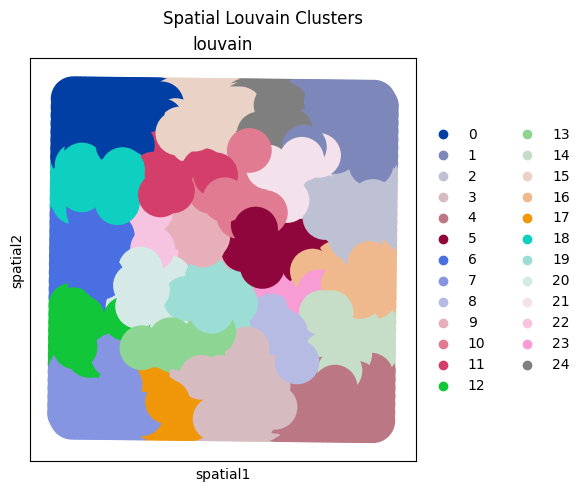

In [15]:
import squidpy as sq
import matplotlib.pyplot as plt

# Assuming 'adata' is loaded and 'louvain' clustering results are in adata.obs['louvain']

# Visualize the spatial clusters
sq.pl.spatial_scatter(adata, color='louvain', size=15, img=False)

plt.suptitle('Spatial Louvain Clusters')
plt.show()

# Optionally, visualize with image background if available
# sq.pl.spatial_scatter(adata, color='louvain', size=15, img=True, img_key='your_image_key') # Replace 'your_image_key'

# Finish task

Summarize the findings from the spatial analysis and provide insights into the biological structure and patterns of the spatial omics data.


Visualizing spatial interactions based on clusters...
Spatial interaction matrix not found or not matching clusters. Recomputing...


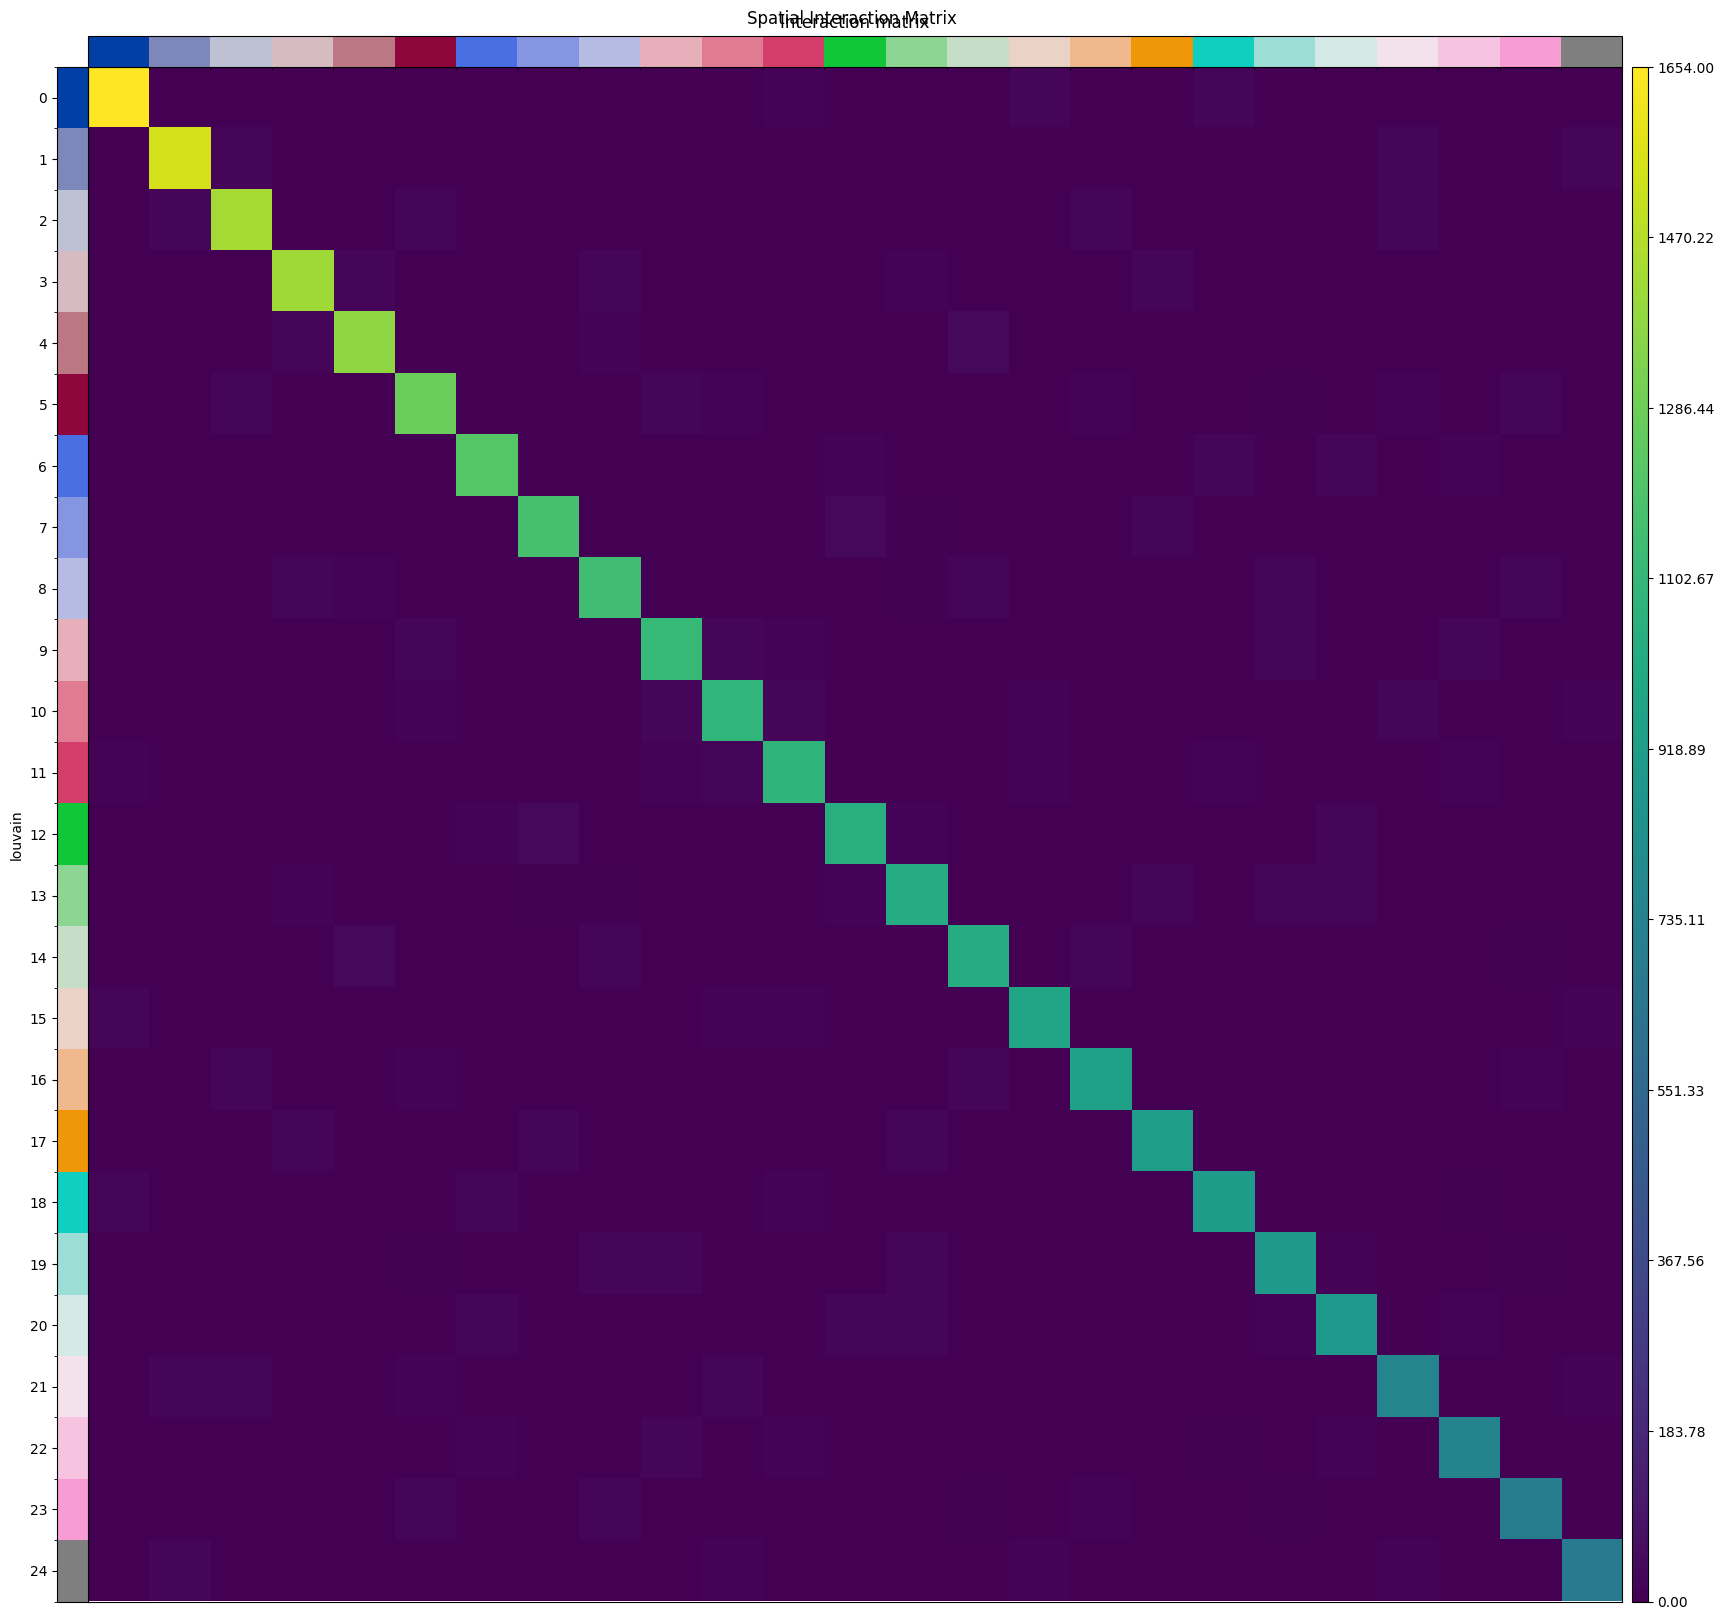

How to interpret the Spatial Interaction Matrix (sq.pl.interaction_matrix):
- Self-interactions (diagonal): High values on the diagonal indicate that spots within the same cluster tend to be neighbors, suggesting the clusters form cohesive spatial domains.
- Inter-cluster interactions (off-diagonal): High values in the off-diagonal cells indicate frequent interactions between different clusters. This suggests that these clusters are often located adjacent to each other in the tissue.
- Identifying interacting pairs: Look for pairs of clusters with high interaction frequencies. These clusters might be physically interacting or located in close proximity for functional reasons.
- Low interaction values: Low values suggest clusters that are rarely found next to each other, possibly indicating they are spatially separated or located in different tissue compartments.

Visualizing spatial co-occurrence probability...
Spatial co-occurrence not found or not matching clusters. Recomputing...


  0%|          | 0/1 [00:00<?, ?/s]

Plotting spatial co-occurrence for cluster: 0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


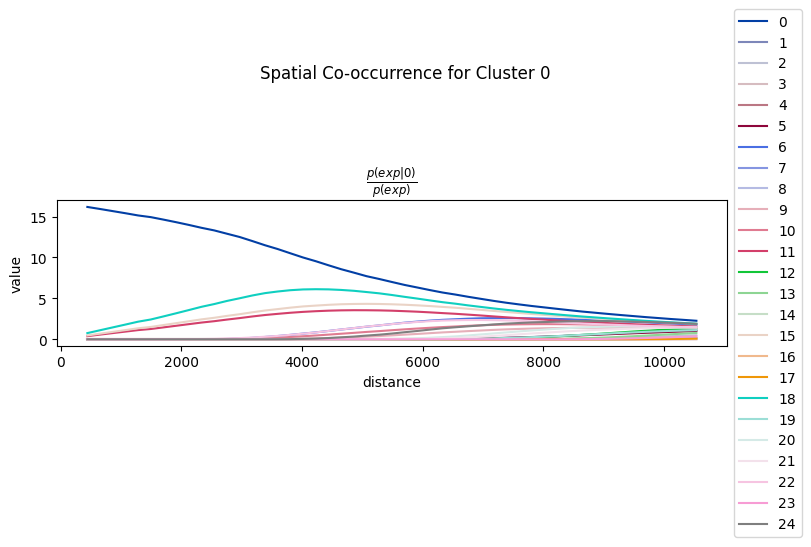

Plotting spatial co-occurrence for cluster: 1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


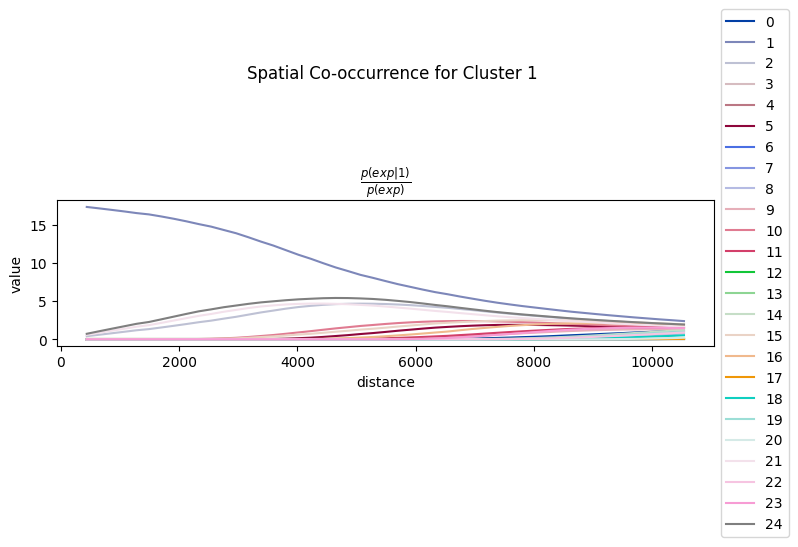

Plotting spatial co-occurrence for cluster: 2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


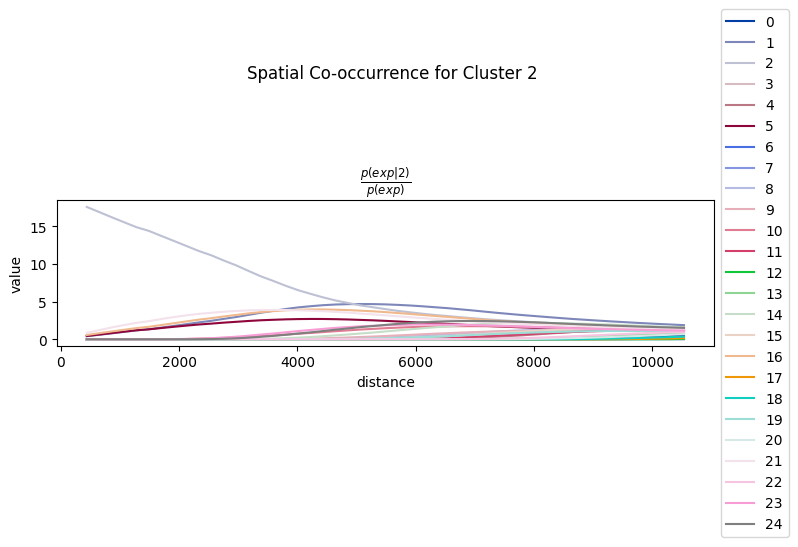

Plotting spatial co-occurrence for cluster: 3


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


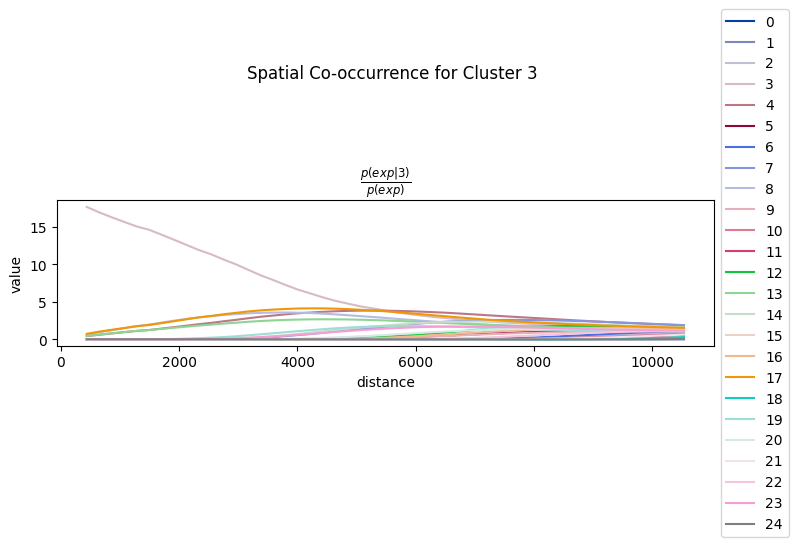

Plotting spatial co-occurrence for cluster: 4


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


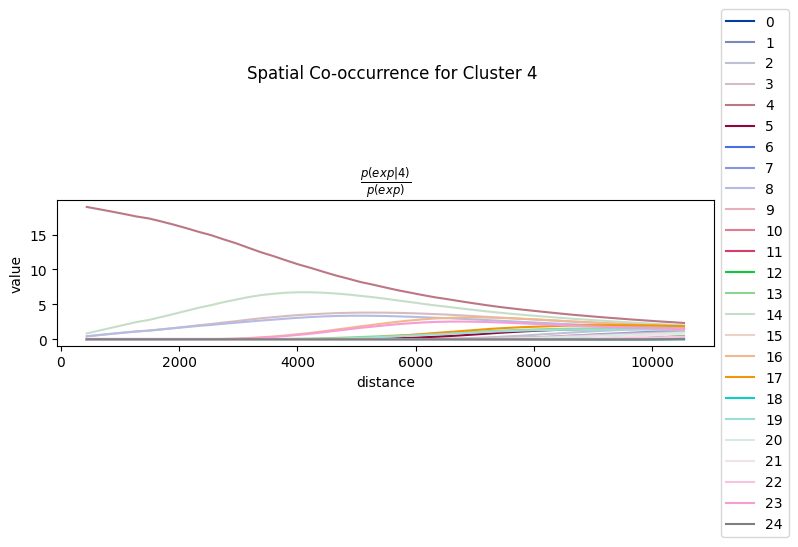

Plotting spatial co-occurrence for cluster: 5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


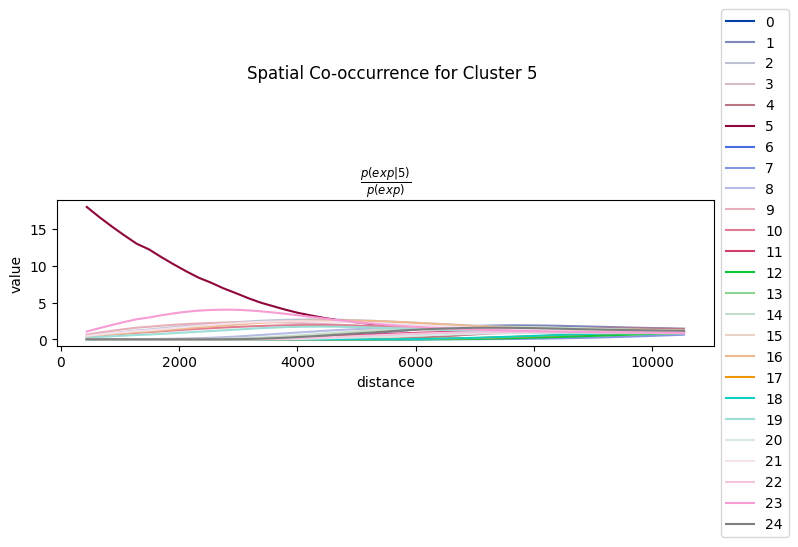

Plotting spatial co-occurrence for cluster: 6


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


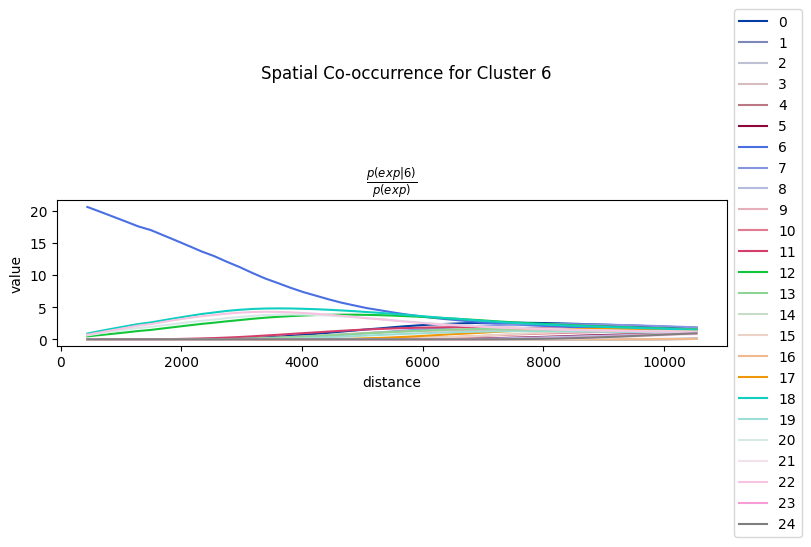

Plotting spatial co-occurrence for cluster: 7


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


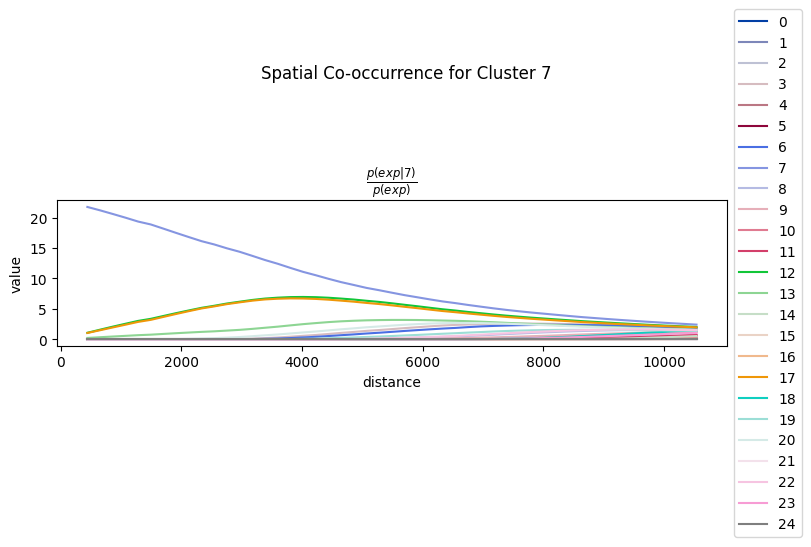

Plotting spatial co-occurrence for cluster: 8


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


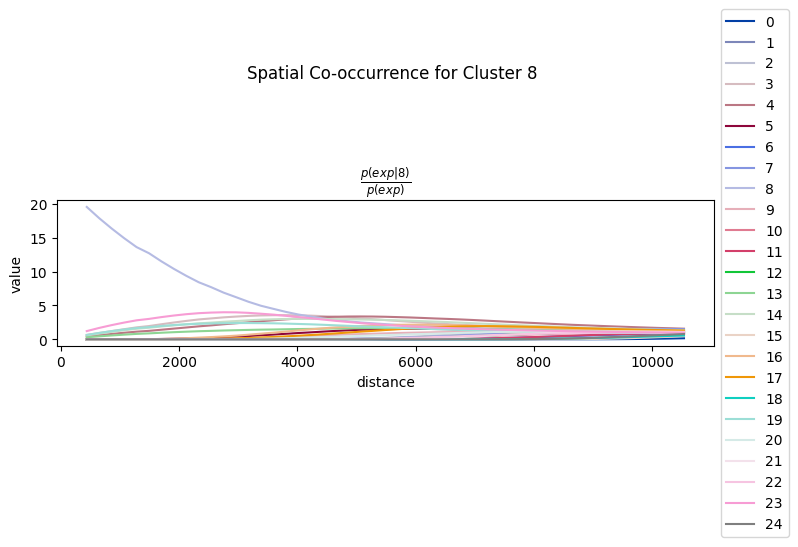

Plotting spatial co-occurrence for cluster: 9


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


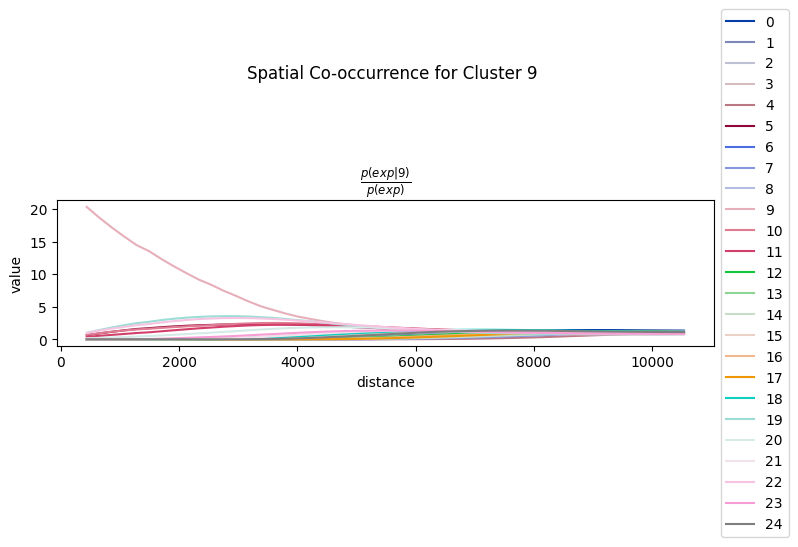

Plotting spatial co-occurrence for cluster: 10


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


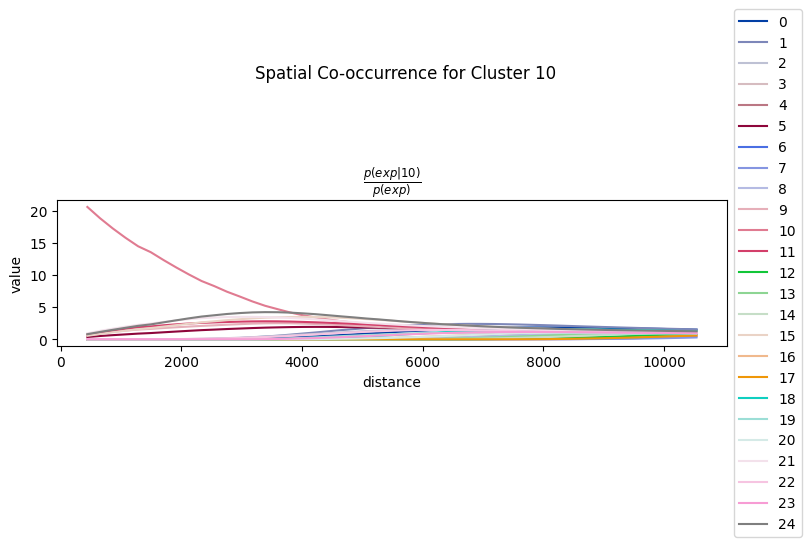

Plotting spatial co-occurrence for cluster: 11


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


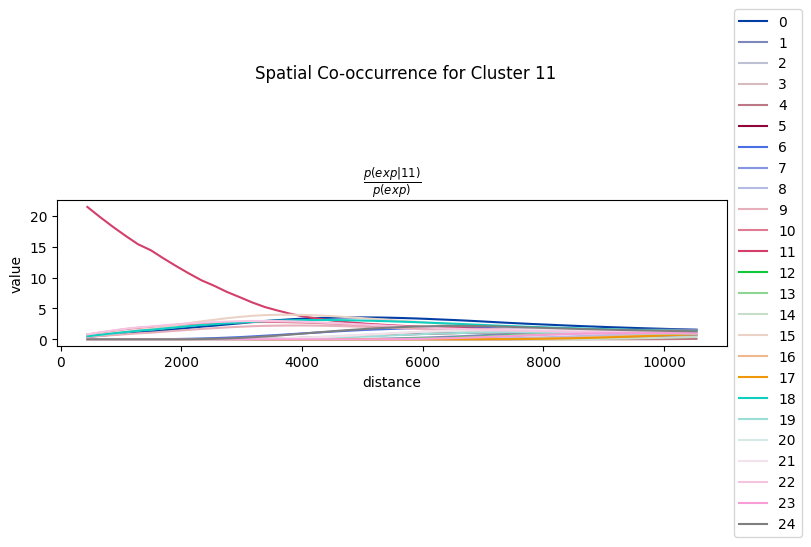

Plotting spatial co-occurrence for cluster: 12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


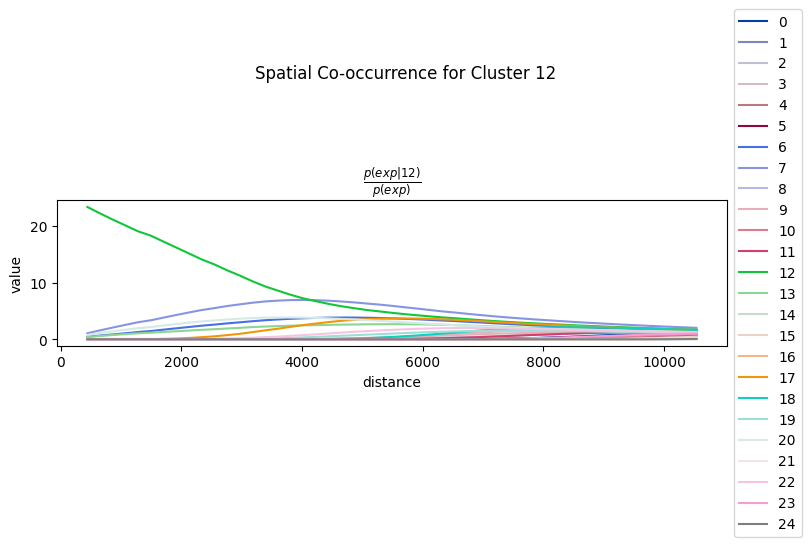

Plotting spatial co-occurrence for cluster: 13


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


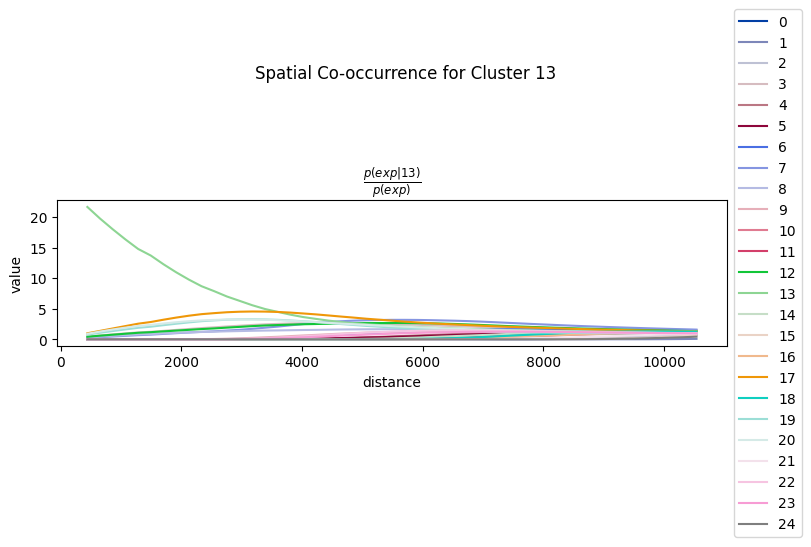

Plotting spatial co-occurrence for cluster: 14


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


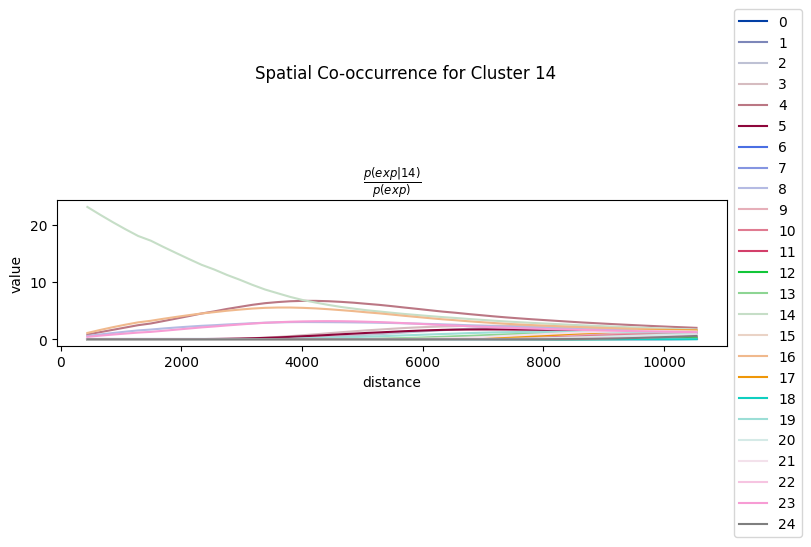

Plotting spatial co-occurrence for cluster: 15


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


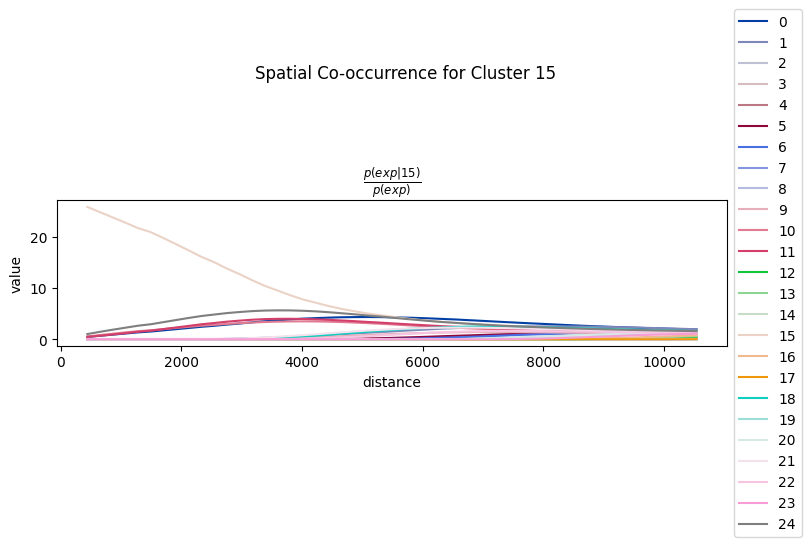

Plotting spatial co-occurrence for cluster: 16


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


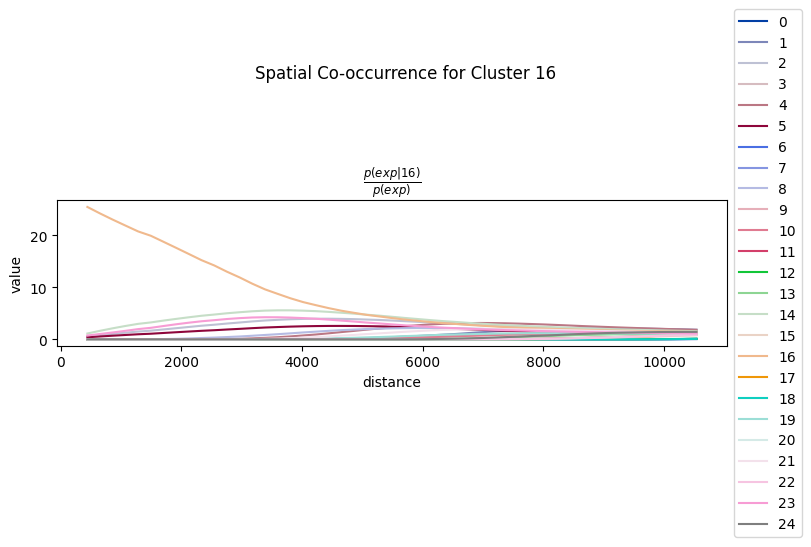

Plotting spatial co-occurrence for cluster: 17


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


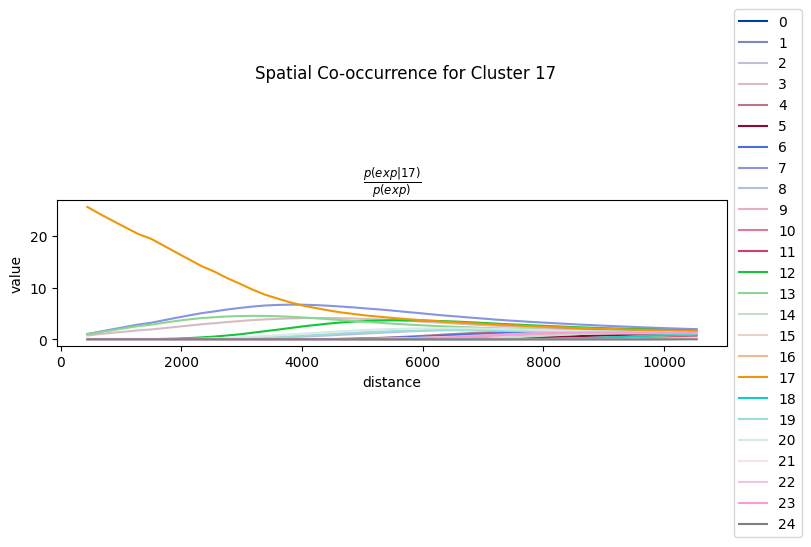

Plotting spatial co-occurrence for cluster: 18


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


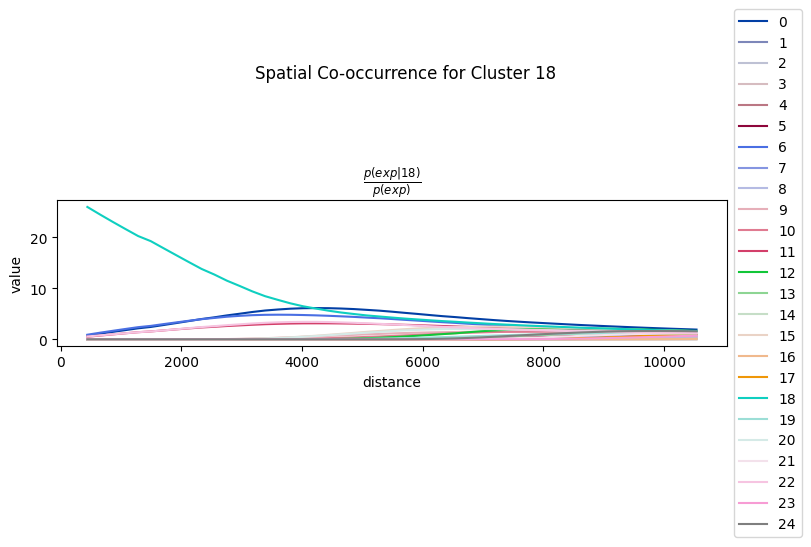

Plotting spatial co-occurrence for cluster: 19


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


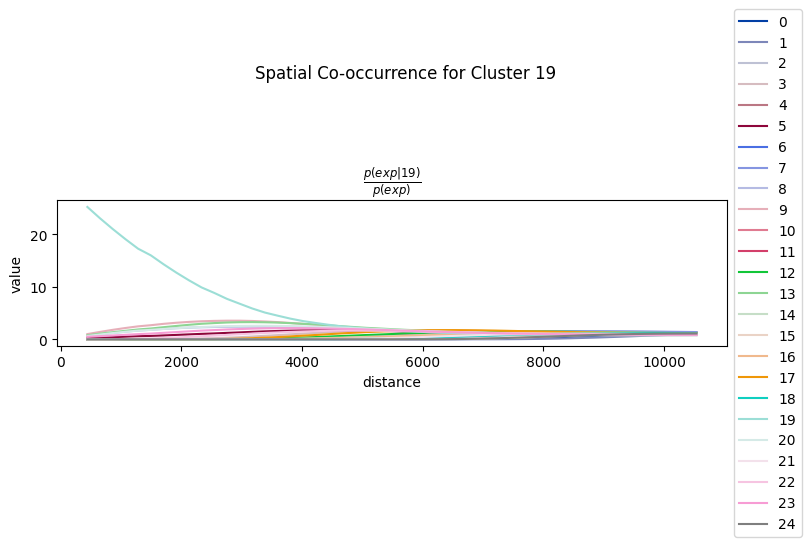

Plotting spatial co-occurrence for cluster: 20


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


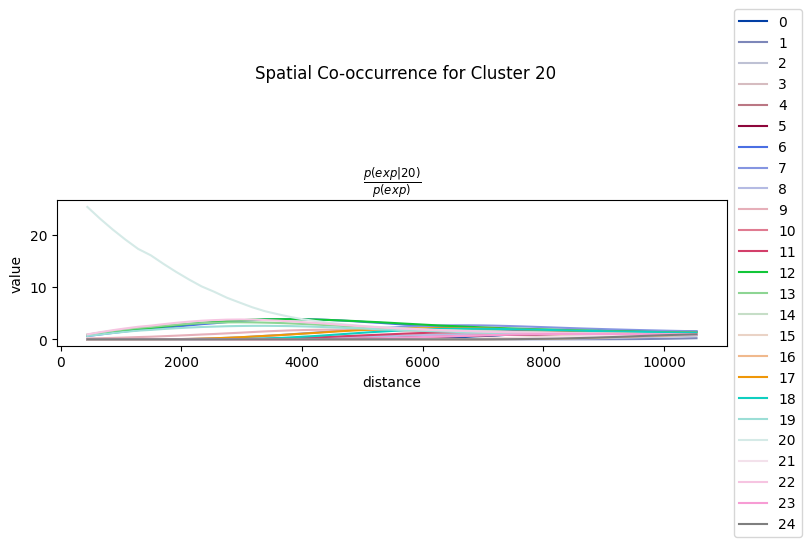

Plotting spatial co-occurrence for cluster: 21


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


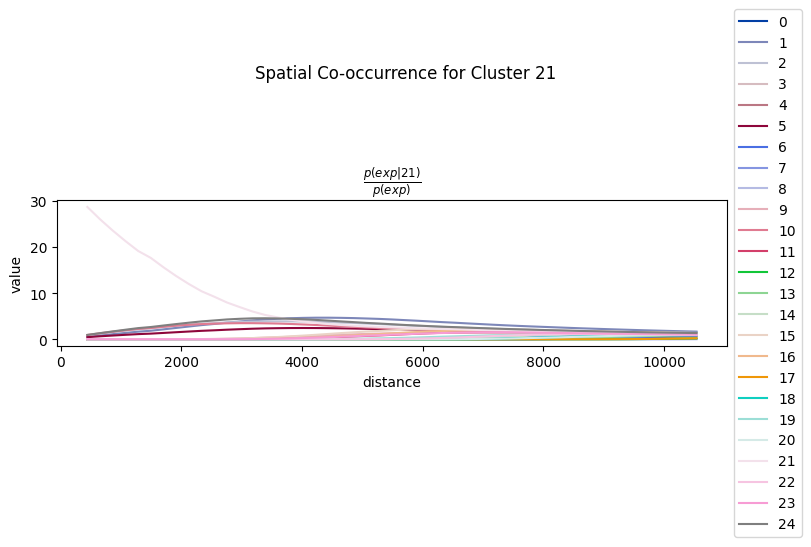

Plotting spatial co-occurrence for cluster: 22


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


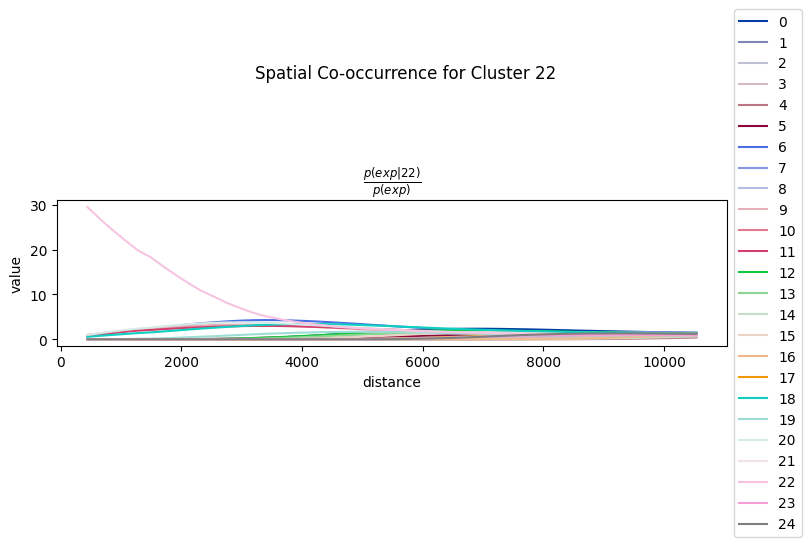

Plotting spatial co-occurrence for cluster: 23


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


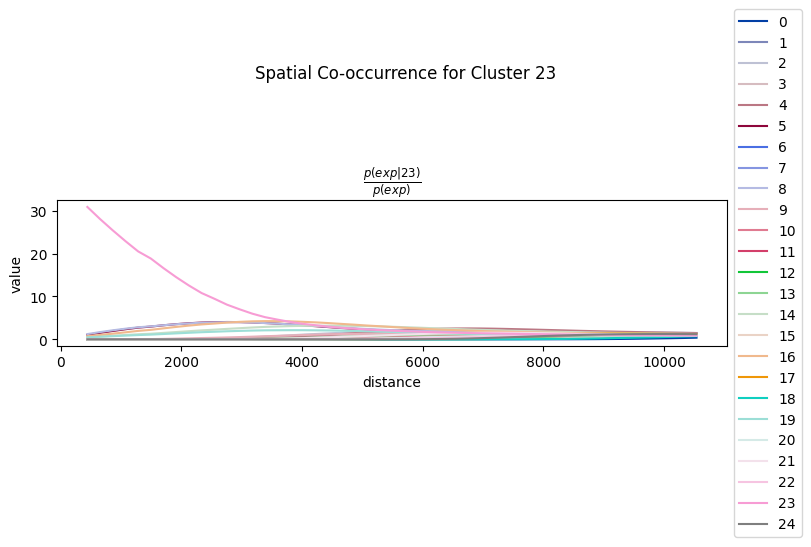

Plotting spatial co-occurrence for cluster: 24


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


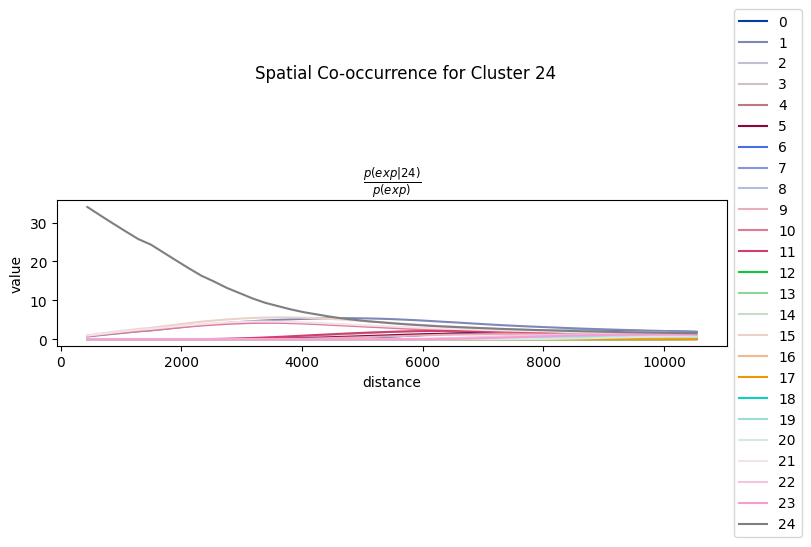

How to interpret the Spatial Co-occurrence Plot (sq.pl.co_occurrence):
- Probability curves: For the selected cluster, look at the lines representing other clusters. A high probability at short distances means that the other cluster is likely to be found immediately next to the selected cluster.
- Distance dependence: Observe how the probability changes with increasing distance. Does the probability drop off quickly, suggesting tight adjacency, or does the probability remain high over longer distances, indicating a more dispersed spatial relationship?
- Enrichment/depletion: Compare the co-occurrence probability to what you would expect by chance. If a cluster is found more often than expected at certain distances, it suggests spatial enrichment. If it's found less often, it suggests spatial depletion.
- Specific spatial scales: This plot helps understand the spatial scale of interactions or co-localization between clusters, providing more detail than the simple adjacency shown by the 

In [16]:
# prompt: Generate these plots and description legends: under them sq.pl.spatial_scatter(adata, color='louvain') How to interpret:
# Self-interactions (diagonal): High values on the diagonal indicate that spots within the same cluster tend to be neighbors, suggesting the clusters form cohesive spatial domains.
# Inter-cluster interactions (off-diagonal): High values in the off-diagonal cells indicate frequent interactions between different clusters. This suggests that these clusters are often located adjacent to each other in the tissue.
# Identifying interacting pairs: Look for pairs of clusters with high interaction frequencies. These clusters might be physically interacting or located in close proximity for functional reasons.
# Low interaction values: Low values suggest clusters that are rarely found next to each other, possibly indicating they are spatially separated or located in different tissue compartments. ,  sq.pl.interaction_matrix(adata, cluster_key='louvain') How to interpret:
# Probability curves: For the selected cluster, look at the lines representing other clusters. A high probability at short distances means that the other cluster is likely to be found immediately next to the selected cluster.
# Distance dependence: Observe how the probability changes with increasing distance. Does the probability drop off quickly, suggesting tight adjacency, or does it remain high over longer distances, indicating a more dispersed spatial relationship?
# Enrichment/depletion: Compare the co-occurrence probability to what you would expect by chance. If a cluster is found more often than expected at certain distances, it suggests spatial enrichment. If it's found less often, it suggests spatial depletion.
# Specific spatial scales: This plot helps understand the spatial scale of interactions or co-localization between clusters, providing more detail than the simple adjacency shown by the interaction matrix. , sq.pl.co_occurrence(adata, cluster_key='louvain', cluster='...' How to interpret

# Assuming 'adata' is loaded and 'louvain' clustering results are in adata.obs['louvain']

# Visualize spatial interactions based on clusters (Adjacency Matrix)
print("\nVisualizing spatial interactions based on clusters...")
if 'louvain' in adata.obs.columns:
    # Ensure interaction matrix has been computed
    if 'interaction_matrix' not in adata.uns or adata.uns['interaction_matrix']['clusters'] != adata.obs['louvain'].cat.categories.tolist():
        print("Spatial interaction matrix not found or not matching clusters. Recomputing...")
        sq.gr.interaction_matrix(adata, cluster_key='louvain')

    sq.pl.interaction_matrix(adata, cluster_key='louvain')
    plt.suptitle('Spatial Interaction Matrix')
    plt.show()
    print("How to interpret the Spatial Interaction Matrix (sq.pl.interaction_matrix):")
    print("- Self-interactions (diagonal): High values on the diagonal indicate that spots within the same cluster tend to be neighbors, suggesting the clusters form cohesive spatial domains.")
    print("- Inter-cluster interactions (off-diagonal): High values in the off-diagonal cells indicate frequent interactions between different clusters. This suggests that these clusters are often located adjacent to each other in the tissue.")
    print("- Identifying interacting pairs: Look for pairs of clusters with high interaction frequencies. These clusters might be physically interacting or located in close proximity for functional reasons.")
    print("- Low interaction values: Low values suggest clusters that are rarely found next to each other, possibly indicating they are spatially separated or located in different tissue compartments.")
else:
    print("'louvain' column not found in adata.obs. Cannot plot spatial interaction matrix.")


# Visualize spatial co-occurrence probability (Distance-dependent relationships)
print("\nVisualizing spatial co-occurrence probability...")
if 'louvain' in adata.obs.columns:
    # Ensure co-occurrence has been computed
    if 'co_occurrence' not in adata.uns or adata.uns['co_occurrence']['clusters'] != adata.obs['louvain'].cat.categories.tolist():
         print("Spatial co-occurrence not found or not matching clusters. Recomputing...")
         sq.gr.co_occurrence(adata, cluster_key='louvain')


    # Plot co-occurrence for each cluster individually
    for cluster_name in adata.obs['louvain'].cat.categories:
         print(f"Plotting spatial co-occurrence for cluster: {cluster_name}")
         sq.pl.co_occurrence(
            adata,
            cluster_key="louvain",
            clusters=cluster_name, # Specify the cluster to plot
            figsize=(8, 4),
         )
         plt.suptitle(f'Spatial Co-occurrence for Cluster {cluster_name}')
         plt.show()

    print("How to interpret the Spatial Co-occurrence Plot (sq.pl.co_occurrence):")
    print("- Probability curves: For the selected cluster, look at the lines representing other clusters. A high probability at short distances means that the other cluster is likely to be found immediately next to the selected cluster.")
    print("- Distance dependence: Observe how the probability changes with increasing distance. Does the probability drop off quickly, suggesting tight adjacency, or does the probability remain high over longer distances, indicating a more dispersed spatial relationship?")
    print("- Enrichment/depletion: Compare the co-occurrence probability to what you would expect by chance. If a cluster is found more often than expected at certain distances, it suggests spatial enrichment. If it's found less often, it suggests spatial depletion.")
    print("- Specific spatial scales: This plot helps understand the spatial scale of interactions or co-localization between clusters, providing more detail than the simple adjacency shown by the interaction matrix.")

else:
    print("'louvain' column not found in adata.obs. Cannot plot spatial co-occurrence.")